In [1]:
import cv2
import json
import pytesseract
import matplotlib.pyplot as plt

In [2]:
def display_images(cv_image, title=""):    
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(cv_image)
    plt.title(title)
     # display that image
    plt.show()

In [3]:
def fix_theme(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, (5, 5))  
    if cv2.mean(blur)[0] > 127: 
        return image #light 
    else:
        return 1 - image #dark 


In [4]:
labels_path = "fastai_labels.json"
with open(labels_path, 'r') as fp:
    labels = json.load(fp)

In [5]:
images_path = '/home/hue/Codes/samandoon/search_twitter/database/media'

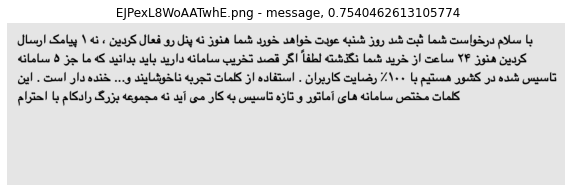

با سلام درخواست شما ثبت شد روز شنبه عودت خواهد خورد شما هنوز نه پنل رو فعال کردین » نه ۱ پیامک ارسال
کردین هنوز ۲۴ ساعت از خرید شما نگذشته لطفاً اگر قصد تخریب سامانه دارید باید بدانید که ما جز ۵ سامانه
تاسیس شده در کشور هستیم با ۱۰۰/ رضایت کاربران . استفاده از کلمات تجربه ناخوشایند و... خنده دار است . این
کلمات مختص سامانه های آماتور و تازه تاسیس به کار می آید نه مجموعه بزرگ رادکام با احترام



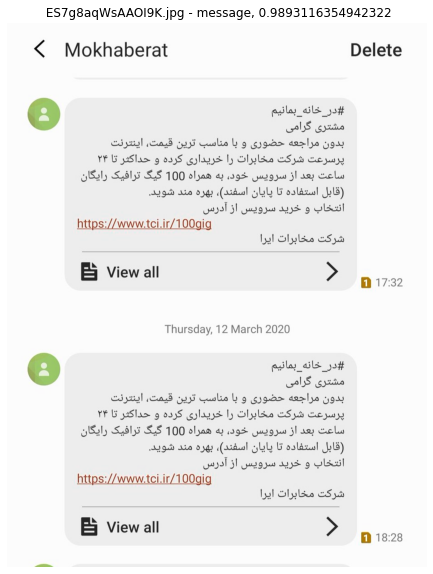

> 02 066

بر خلت ردالد 1
مشتری گرامی

بدون مراجعه حضوری و با مناسب ترین قیمت, اینترنت
پرسرعت شرکت مخابرات را خریداری کرده و حداکثر تا ۲۴
ساعت بعد از سرویس خود, به همراه 100 گیگ ترافیک رایگان
(قابل استفاده تا پایان اسفند), بهره مند شوید.

انتخاب و خرید سرویس از آدرس

وزو۱۱۱۵6۰//۷۷۷۷۱۷۸۷۰۱۵۲۰۱۲/100

شرکت مخابرات ایرا

‌ ااه ۷۱۵۸ 8

0" 2

۲۷۲5۵۵۱, 12 ۱/۵۲۵۱ 0

#در_خانه_بمانیم ۹
مشتری گرامی

بدون مراجعه حضوری و با مناسب ترین قیمت, اینترنت
پرسرعت شری محایرات را حریداری کرده و حداعتر تا ۱۳
ساعت بعد از سرویس خود. به همراه 100 گیگ ترافیک رایگان
(قابل استفاده تا پایان اسفند), بهره مند شوید.

انتخاب و خرید سرویس از آدرس

ونو۱۲۸۵6۰://۷۷۷۷۷۸۸۰۵۵۱۰۱۲/100
شرکت مخابرات ایرا

‌ ااه ۷۱۵۸ 8

۵ 8

 

 



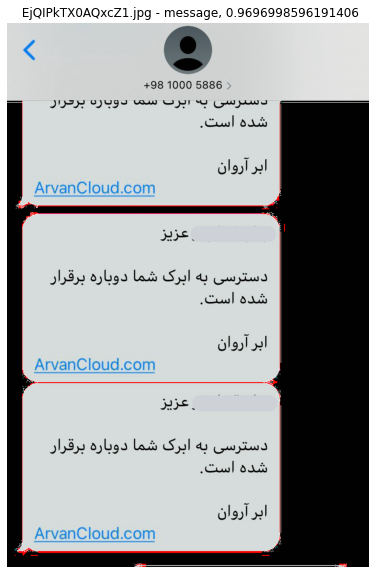

 

6 1000 98+
دسبرسی به :پرت سم دوپ ره پرجرار
شده است.

ابر آروان

دسترسی به ابرک شما دوباره برقرار

ابر آروان

دسترسی به ابرک شما دوباره برقرار

ابر آروان

 



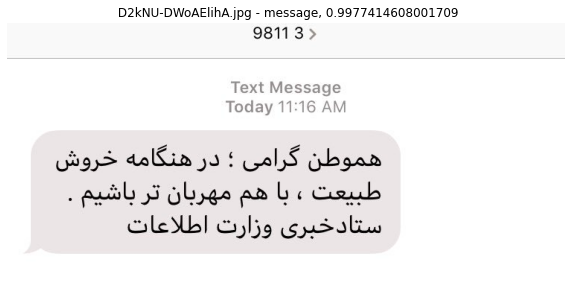

هموطن گرامی ؛ در هنگامه خروش
طبیعت » با هم مهربان تر باشیم .



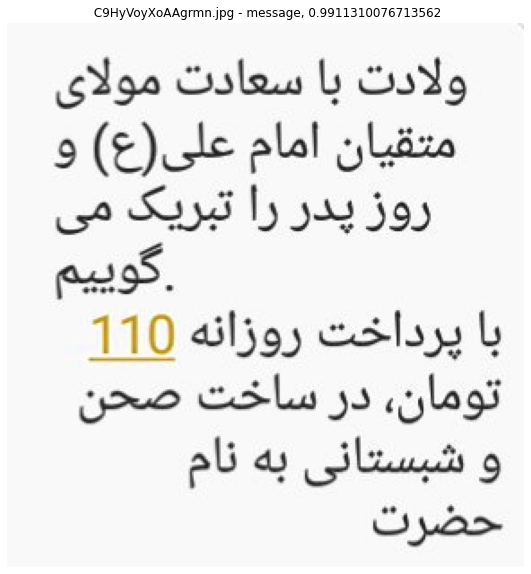

ولادت با سعادت مولای
متقیان امام علی(ع) و
روز پدر را تبریک می
.گوییم
با پرداخت روزانه 110
تومان, در ساخت صحن
و شبستانی به نام
حضرت



In [9]:
idx = 0
for file_name, (label, accuracy) in labels.items():
    if label == "message":
        idx+=1
        file_path = images_path + "/" + file_name
        image=fix_theme(cv2.imread(file_path))
        display_images(image, f" {file_name} - {label}, {accuracy}")
        
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        print(pytesseract.image_to_string(img_rgb, lang='fas'))
        if idx >=5:
            break
